<a href="https://colab.research.google.com/github/fwairynah/LE2_Magboo_LC/blob/main/LE2_Magboo_LC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [227]:
balance_scale = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LE2_Magboo_LC/balance_scale.csv'))

In [228]:
balance_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   right distance  625 non-null    int64 
 1   right weight    625 non-null    int64 
 2   left distance   625 non-null    int64 
 3   left weight     625 non-null    int64 
 4   class           625 non-null    object
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [229]:
balance_scale.columns

Index(['right distance', 'right weight', 'left distance', 'left weight',
       'class'],
      dtype='object')

In [230]:
balance_scale.head()

,right distance,right weight,left distance,left weight,class
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R


In [232]:
balance_scale.isnull().sum()*100/balance_scale.shape[0]

right distance    0.0
right weight      0.0
left distance     0.0
left weight       0.0
class             0.0
dtype: float64

In [233]:
balance_scale.drop_duplicates(inplace=True)

In [264]:
balance_scale.shape

(625, 5)

In [234]:
# Display basic information about the dataset after cleaning
print("\nDataset Information After Cleaning:")
print(balance_scale.info())


Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   right distance  625 non-null    int64 
 1   right weight    625 non-null    int64 
 2   left distance   625 non-null    int64 
 3   left weight     625 non-null    int64 
 4   class           625 non-null    object
dtypes: int64(4), object(1)
memory usage: 24.5+ KB
None


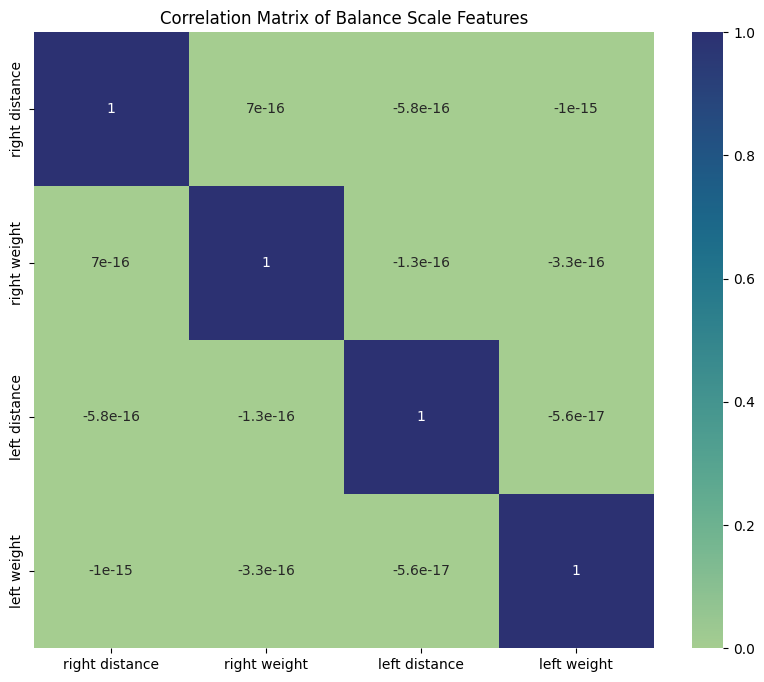

In [252]:
# Plot correlation heatmap for selected features
columns = ['right distance', 'right weight', 'left distance', 'left weight']

balance_scale_selected = balance_scale[columns]
plt.figure(figsize = (10, 8))
sns.heatmap(balance_scale_selected.corr(), annot = True, cmap="crest")

plt.title('Correlation Matrix of Balance Scale Features')
plt.show()

In [161]:
# features & target
X = balance_scale[['right distance', 'right weight', 'left distance', 'left weight']]
y = balance_scale ['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [261]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Confusion Matrix & Classification Report for Models
for metrics, algo in models.items():
    algo.fit(X_train, y_train)
    y_test_pred = algo.predict(X_test)
    cmatrix = confusion_matrix(y_test, y_test_pred)

    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_percentage = accuracy * 100
    print(f"{metrics} Accuracy: {accuracy_percentage:.2f}%")

    class_report = classification_report(y_test, y_test_pred)
    print(f"{metrics} (Classification Report):\n{class_report}")

Decision Tree Accuracy: 78.19%
Decision Tree (Classification Report):
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.79      0.94      0.86        80
           R       0.94      0.80      0.86        90

    accuracy                           0.78       188
   macro avg       0.57      0.58      0.57       188
weighted avg       0.78      0.78      0.78       188

Random Forest Accuracy: 81.38%
Random Forest (Classification Report):
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.84      0.95      0.89        80
           R       0.91      0.86      0.88        90

    accuracy                           0.81       188
   macro avg       0.58      0.60      0.59       188
weighted avg       0.79      0.81      0.80       188

Logistic Regression Accuracy: 84.57%
Logistic Regression (Classification Report):
              pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

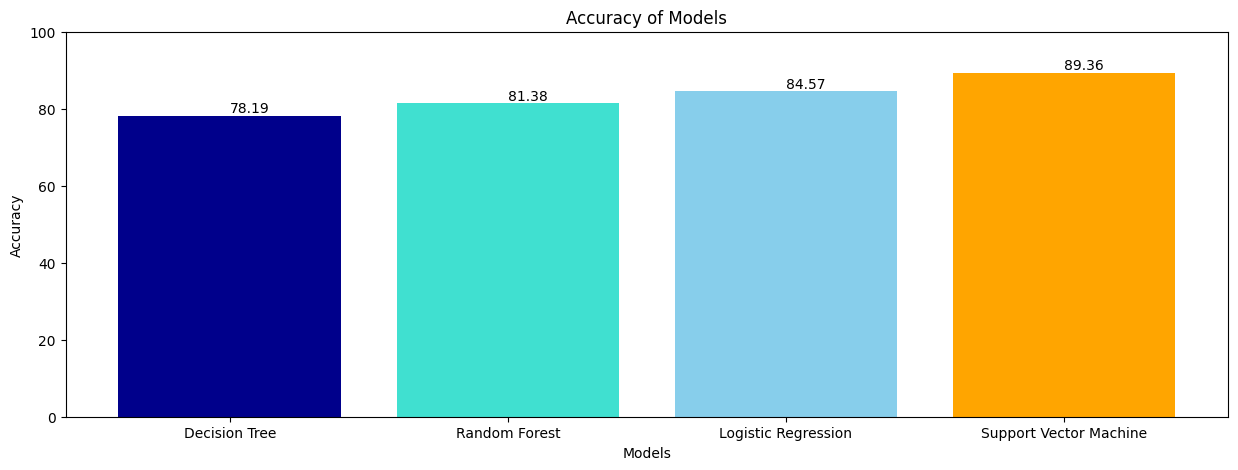

In [249]:
# Comparison of Models' Accuracy
acc = {}

for metrics, algo in models.items():
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc[metrics] = accuracy * 100

plt.figure(figsize=(15, 5))
plt.ylim(0, 100)
bars = plt.bar(acc.keys(), acc.values(), color=['darkblue', 'turquoise', 'skyblue', 'orange'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

Summary of Model Accuracies:
Original: 89.36%
Stacking: 89.36%
AdaBoost: 42.55%
Bagging: 89.36%


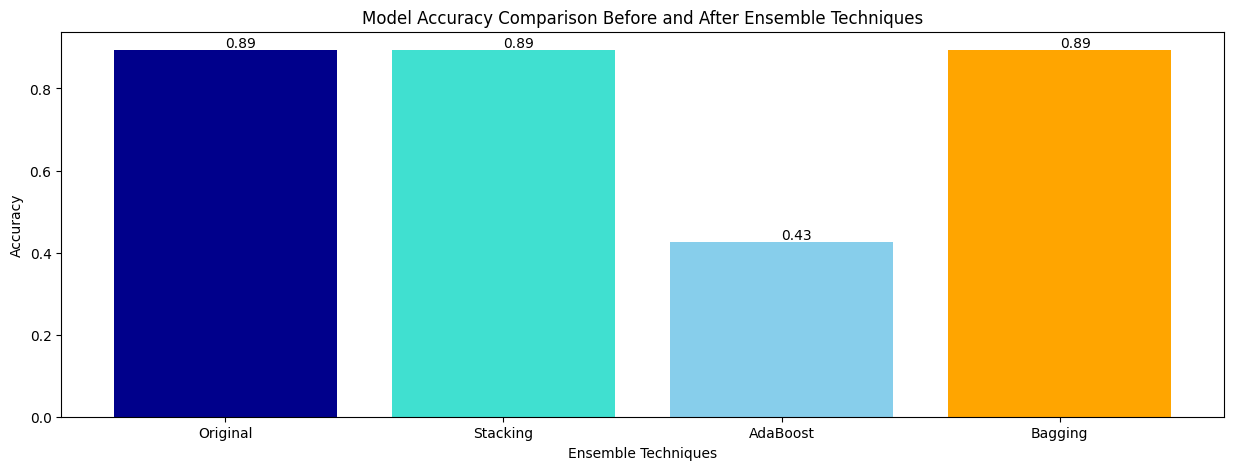

In [263]:
# Find the highest performing model
highacc_mod = max(acc, key=acc.get)
high_mod = models[highacc_mod]

# Train and evaluate the highest performing model
mod = high_mod.fit(X_train, y_train)
predictions_highest = high_mod.predict(X_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

# Apply ensemble techniques to the highest performing model

# Stacking Classifier
stacking = StackingClassifier(estimators=[('highest_model', high_mod)], final_estimator=LogisticRegression(max_iter=1000))
stacking.fit(X_train, y_train)
stacking_score = stacking.score(X_test, y_test)

# AdaBoost Classifier
ada = AdaBoostClassifier(estimator=high_mod, n_estimators=500, algorithm='SAMME')
ada.fit(X_train, y_train)
ada_score = ada.score(X_test, y_test)

# Bagging Classifier
bagging = BaggingClassifier(estimator=high_mod, n_estimators=500)
bagging.fit(X_train, y_train)
bagging_score = bagging.score(X_test, y_test)

tech = {
    "Original": accuracy_highest,
    "Stacking": stacking_score,
    "AdaBoost": ada_score,
    "Bagging": bagging_score
}

plt.figure(figsize=(15, 5))
#plt.ylim(0, 100)
bars = plt.bar(tech.keys(), tech.values(), color=['darkblue', 'turquoise', 'skyblue', 'orange'])
plt.xlabel('Ensemble Techniques')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before and After Ensemble Techniques')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in tech.items():
    print(f"{model}: {accuracy*100:.2f}%")